In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sample-for-assessment-olympic-teams/teams.csv


# 1. Data Loading

In [90]:
teams=pd.read_csv("/kaggle/input/sample-for-assessment-olympic-teams/teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [119]:
teams=teams[["team","country","year","athletes","age","events","prev_medals","medals"]]
teams

,team,country,year,athletes,age,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,8,0.0,0
1,AFG,Afghanistan,1968,5,23.2,5,0.0,0
2,AFG,Afghanistan,1972,8,29.0,8,0.0,0
3,AFG,Afghanistan,1980,11,23.6,11,0.0,0
4,AFG,Afghanistan,2004,5,18.6,5,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,19,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,11,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,15,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0


# 2. Data Exploration

In [71]:
#Verify correlations between cols
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
events         0.771330
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [4]:
import seaborn as sns

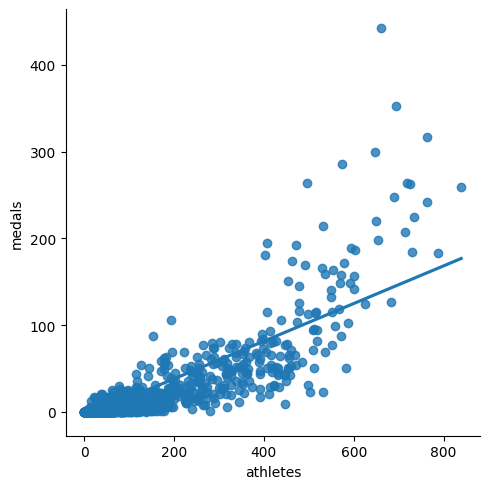

In [5]:
#High correlation between athletes and medals
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)

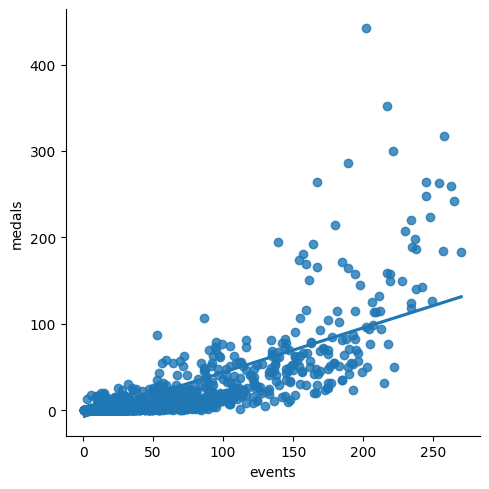

In [72]:
#High correlation between events and medals
sns.lmplot(x="events",y="medals",data=teams,fit_reg=True,ci=None)

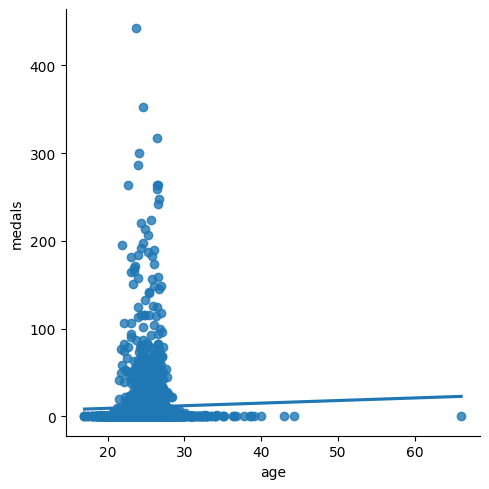

In [6]:
#low correlation between age and medals
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

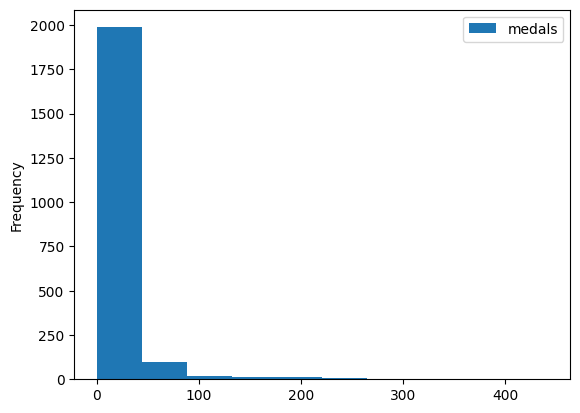

In [7]:
teams.plot.hist(y="medals")

In [92]:
#Finding missing values
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,events,prev_medals,medals
19,ALB,Albania,1992,9,25.3,8,NaN,0
26,ALG,Algeria,1964,7,26.0,7,NaN,0
39,AND,Andorra,1976,3,28.3,2,NaN,0
50,ANG,Angola,1980,17,17.4,14,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,11,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,6,NaN,0
2103,YAR,North Yemen,1984,3,27.7,3,NaN,0
2105,YEM,Yemen,1992,8,19.6,8,NaN,0
2112,YMD,South Yemen,1988,5,23.6,5,NaN,0


In [93]:
#Dropping cols with missing vals
teams=teams.dropna()
teams

,team,country,year,athletes,age,events,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,8,0.0,0
1,AFG,Afghanistan,1968,5,23.2,5,0.0,0
2,AFG,Afghanistan,1972,8,29.0,8,0.0,0
3,AFG,Afghanistan,1980,11,23.6,11,0.0,0
4,AFG,Afghanistan,2004,5,18.6,5,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,19,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,11,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,15,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0


# 3. Building the model

In [94]:
#Spliting data
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [95]:
#Checking the shape of our data
train.shape 

(1609, 8)

In [96]:
test.shape

(405, 8)

In [97]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=1)

In [98]:
#Defining the cols that we are going to use to predict our target
predictors=["athletes","prev_medals","events"]
#Selecting the target that we gonna predict
target="medals"

In [99]:
rf.fit(train[predictors],train["medals"])

RandomForestRegressor(random_state=1)

In [100]:
predictions=rf.predict(test[predictors])

In [101]:
test["predictions"]=predictions
test

,team,country,year,athletes,age,events,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,6,1.0,1,0.007565
7,AFG,Afghanistan,2016,3,24.7,3,1.0,0,0.041548
24,ALB,Albania,2012,10,25.7,9,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,6,0.0,0,0.027425
37,ALG,Algeria,2012,39,24.8,29,2.0,1,1.536667
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,3,0.0,0,0.016223
2131,ZAM,Zambia,2012,7,22.6,7,0.0,0,0.024311
2132,ZAM,Zambia,2016,7,24.1,7,0.0,0,0.024311
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0,3.394286


In [102]:
#Finding any rows where predictions cols < 0 and replace them with a 0
test.loc[test["predictions"]<0,"predictions"]=0

test["predictions"]=test["predictions"].round()

In [103]:
test

,team,country,year,athletes,age,events,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,6,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,3,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,9,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,6,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,29,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,7,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,7,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,8,4.0,0,3.0


# 4. Measuring error

In [104]:
from sklearn.metrics import mean_absolute_error

error=mean_absolute_error(test["medals"],test["predictions"])

In [105]:
error

3.417283950617284

In [106]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

It's a good sign that error < std

# 5. Is the model good?

In [107]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,events,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,245,317.0,248,278.0
2054,USA,United States,2016,719,26.4,245,248.0,264,245.0


In [108]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,events,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,55,3.0,6,3.0
908,IND,India,2016,130,26.1,67,6.0,2,7.0


In [109]:
#Finding the MAE
errors=(test["medals"]-test["predictions"]).abs()
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    3.0
2143    0.0
Length: 405, dtype: float64

In [110]:
error_by_team=errors.groupby(test["team"]).mean()

In [111]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    1.0
      ... 
VIE    0.5
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.5
Length: 204, dtype: float64

In [112]:
medals_by_team=test["medals"].groupby(test["team"]).mean()

In [113]:
error_ratio=error_by_team/medals_by_team

In [114]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    inf
      ... 
VIE    0.5
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [115]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ANG         inf
ARG    0.878049
ARM    0.142857
         ...   
USA    0.095703
UZB    0.562500
VEN    0.500000
VIE    0.500000
ZIM         inf
Length: 108, dtype: float64

In [116]:
#cleaning infinite vals
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [117]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.878049
ARM    0.142857
AUS    0.244898
         ...   
UKR    0.926829
USA    0.095703
UZB    0.562500
VEN    0.500000
VIE    0.500000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

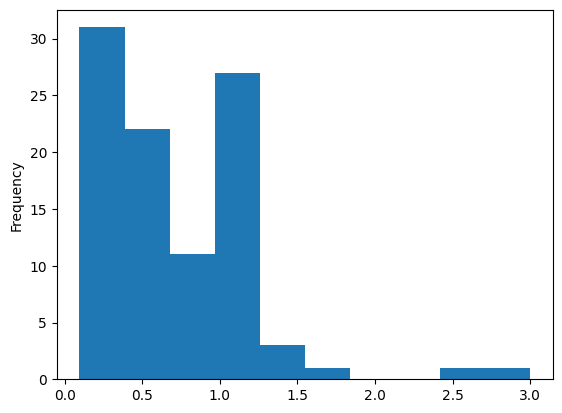

In [118]:
error_ratio.plot.hist()